# Auto Insurance Data Analysis

This notebook contains the analysis of the auto insurance data downloaded from Kaggle. We will perform exploratory data analysis (EDA) and visualize the results.

In [ ]:
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load environment variables from the .env file
load_dotenv()
# Set visualization style
sns.set(style='darkgrid')
# Load the file path from an environment variable
file_path = os.getenv('ROAD_ACCIDENT_DATA_PATH')

if not file_path:
    raise ValueError("Please set the 'ROAD_ACCIDENT_DATA_PATH' environment variable.")

data = pd.read_excel(file_path)

In [15]:
# Exploratory Data Analysis (EDA)

# Summary statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Month                       307973 non-null  object        
 3   Day_of_Week                 307973 non-null  object        
 4   Year                        307973 non-null  int64         
 5   Junction_Control            307973 non-null  object        
 6   Junction_Detail             307973 non-null  object        
 7   Accident_Severity           307973 non-null  object        
 8   Latitude                    307973 non-null  float64       
 9   Light_Conditions            307973 non-null  object        
 10  Local_Authority_(District)  307973 non-null  object        
 11  Carriageway_Hazards         307970 non-

,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021.468934,52.487005,-1.368884,1.356882,1.829063,38.866037
std,0.499035,1.339011,1.356092,0.815857,0.710477,14.032933
min,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021.000000,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021.000000,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022.000000,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000


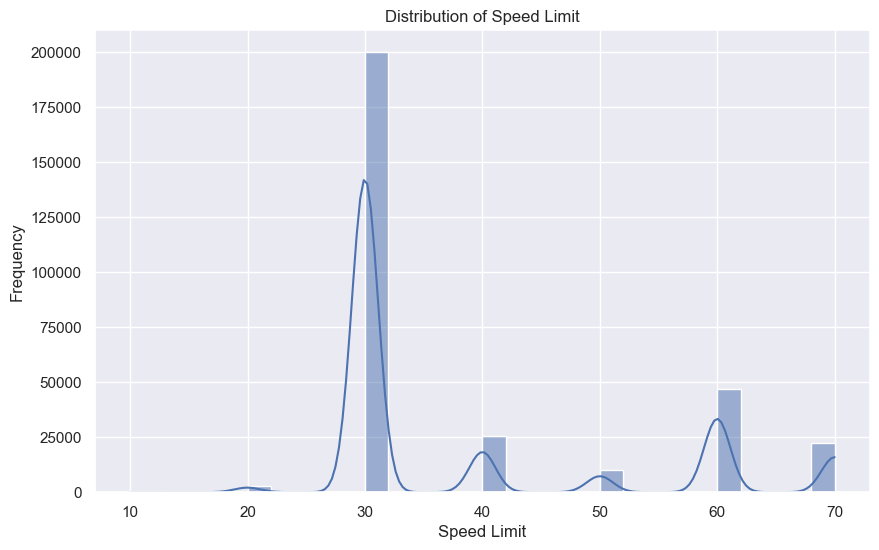

In [13]:
# Visualize the distribution of a key variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Speed_limit'], bins=30, kde=True)
plt.title('Distribution of Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.show()

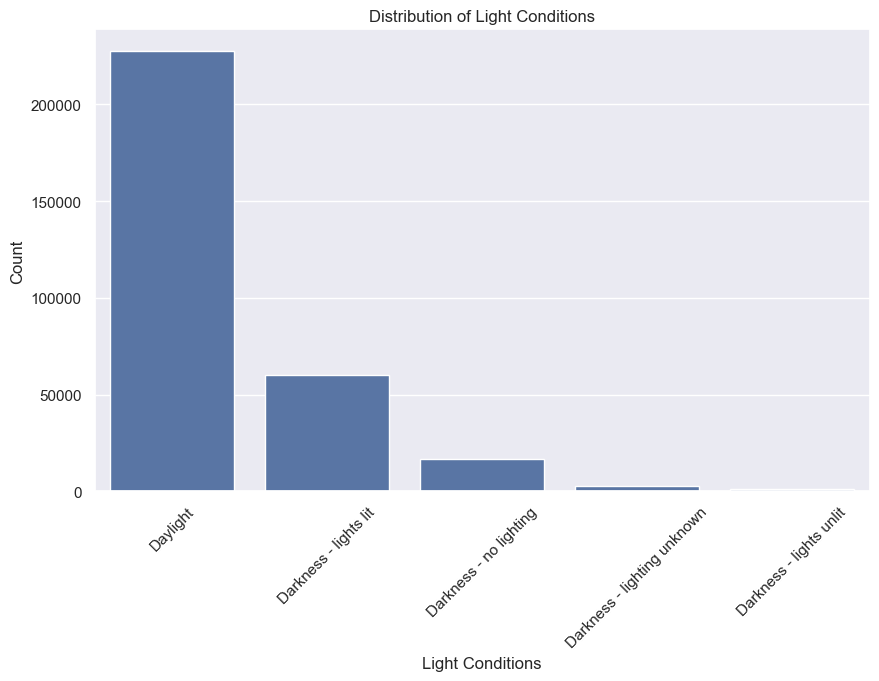

In [18]:
# Count the occurrences of each category in Light_Conditions
light_conditions_counts = data['Light_Conditions'].value_counts()

# Visualize the distribution of Light Conditions
plt.figure(figsize=(10, 6))
sns.barplot(x=light_conditions_counts.index, y=light_conditions_counts.values)
plt.title('Distribution of Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if they are too long
plt.show()

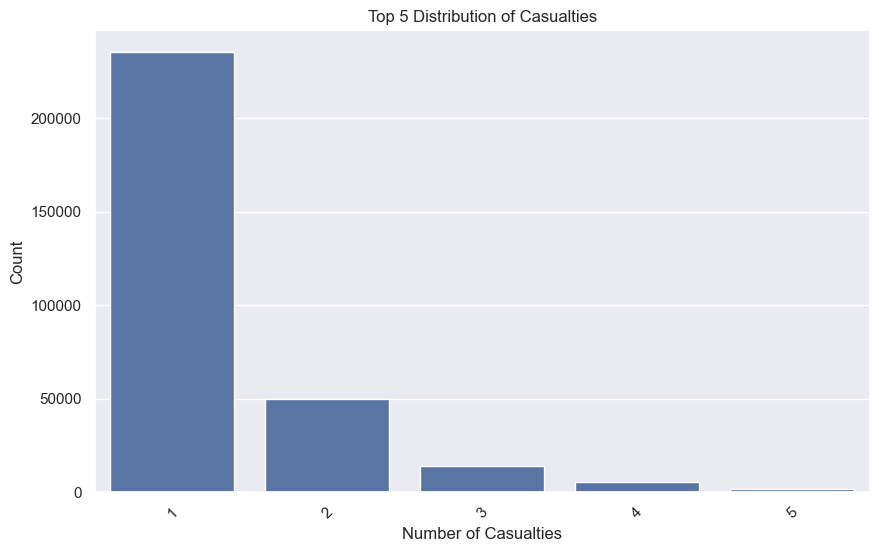

In [20]:

# Count the occurrences of each category in Number_of_Casualties
number_of_casualties_counts = data['Number_of_Casualties'].value_counts().head(5)

# Visualize the distribution of the top 5 Number of Casualties
plt.figure(figsize=(10, 6))
sns.barplot(x=number_of_casualties_counts.index, y=number_of_casualties_counts.values)
plt.title('Top 5 Distribution of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if they are too long
plt.show()

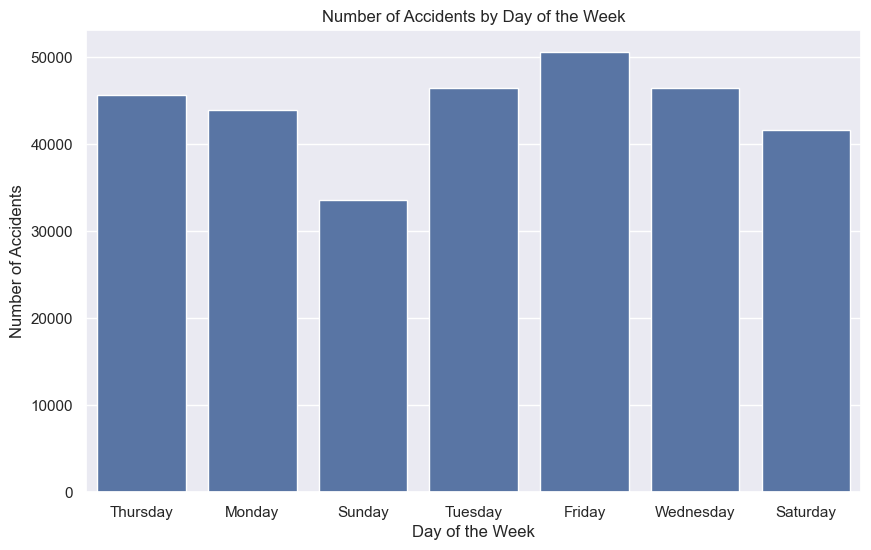

In [22]:
# Visualize the number of accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Day_of_Week')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

In [24]:
# Generate a report of key statistics
report = data.groupby('Year').agg({
    'Number_of_Casualties': 'sum',
    'Number_of_Vehicles': 'sum'
}).reset_index()

print(report)

   Year  Number_of_Casualties  Number_of_Vehicles
0  2021                222146              298687
1  2022                195737              264615


In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Month                       307973 non-null  object        
 3   Day_of_Week                 307973 non-null  object        
 4   Year                        307973 non-null  int64         
 5   Junction_Control            307973 non-null  object        
 6   Junction_Detail             307973 non-null  object        
 7   Accident_Severity           307973 non-null  object        
 8   Latitude                    307973 non-null  float64       
 9   Light_Conditions            307973 non-null  object        
 10  Local_Authority_(District)  307973 non-null  object        
 11  Carriageway_Hazards         307970 non-

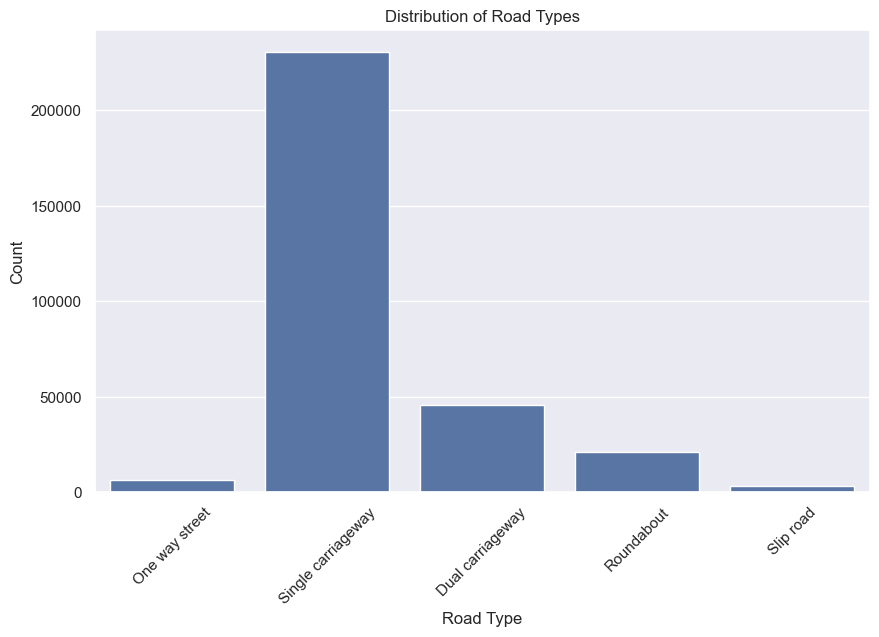

In [27]:
# Visualize the distribution of road types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Type')
plt.title('Distribution of Road Types')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if they are too long
plt.show()

In [28]:
road_type_counts = data['Road_Type'].value_counts()
print("Road Type Counts:\n", road_type_counts)

Road Type Counts:
 Single carriageway    230612
Dual carriageway       45467
Roundabout             20929
One way street          6197
Slip road               3234
Name: Road_Type, dtype: int64


In [29]:
correlation = data[['Weather_Conditions', 'Accident_Severity']].corr()
print("Correlation between Weather Conditions and Accident Severity:\n", correlation)

Correlation between Weather Conditions and Accident Severity:
 Empty DataFrame
Columns: []
Index: []


C:\Users\Mitch\AppData\Local\Temp\ipykernel_23344\4089523071.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data[['Weather_Conditions', 'Accident_Severity']].corr()


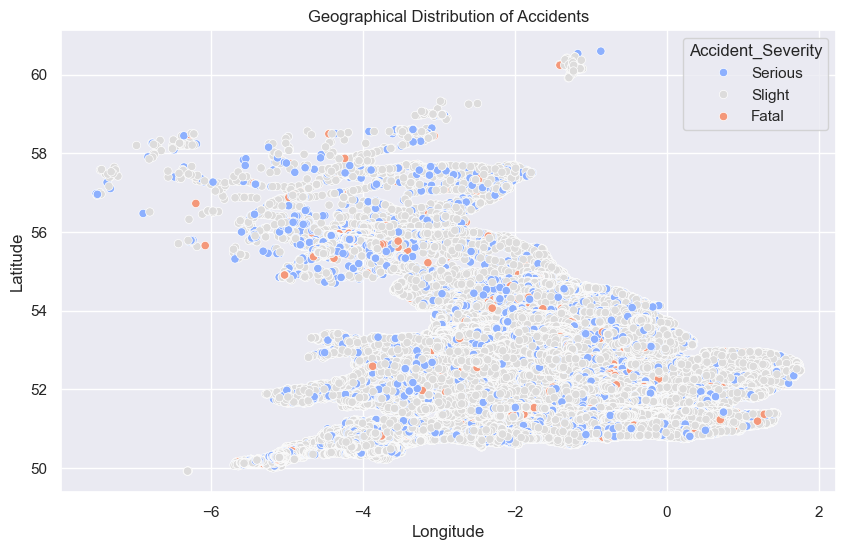

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=data, hue='Accident_Severity', palette='coolwarm')
plt.title('Geographical Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

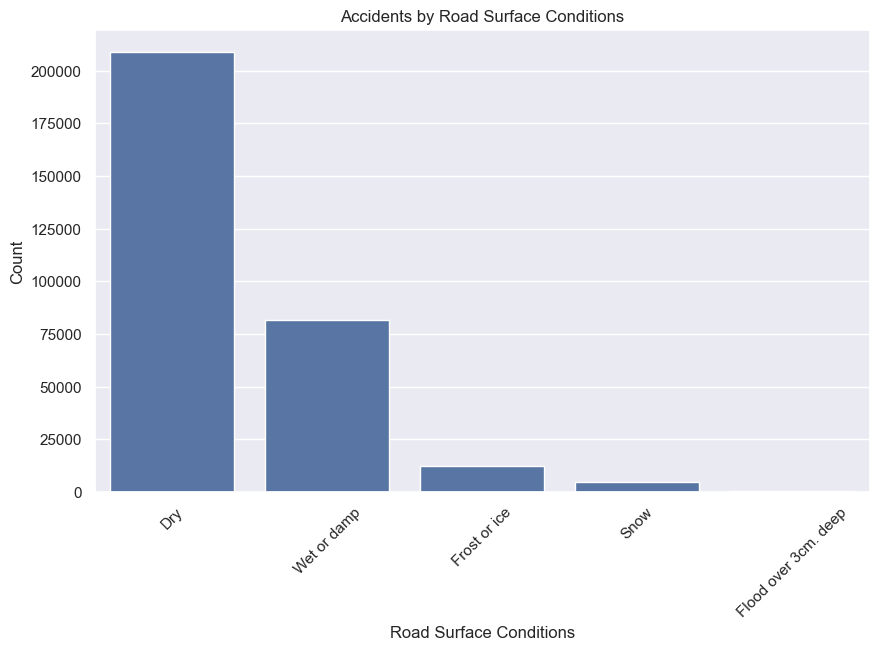

In [31]:
road_conditions_counts = data['Road_Surface_Conditions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=road_conditions_counts.index, y=road_conditions_counts.values)
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Convert categorical columns to numeric codes if they are not already numeric
data['Weather_Conditions'] = data['Weather_Conditions'].astype('category').cat.codes
data['Accident_Severity'] = data['Accident_Severity'].astype('category').cat.codes

# Calculate the correlation
correlation = data[['Weather_Conditions', 'Accident_Severity']].corr()
print("Correlation between Weather Conditions and Accident Severity:\n", correlation)

Correlation between Weather Conditions and Accident Severity:
                     Weather_Conditions  Accident_Severity
Weather_Conditions            1.000000           0.023339
Accident_Severity             0.023339           1.000000


In [33]:
# Convert Road_Type to numeric codes
data['Road_Type'] = data['Road_Type'].astype('category').cat.codes

# Calculate the correlation
correlation = data[['Road_Type', 'Accident_Severity']].corr()
print("Correlation between Road Type and Accident Severity:\n", correlation)

Correlation between Road Type and Accident Severity:
                    Road_Type  Accident_Severity
Road_Type           1.000000          -0.016786
Accident_Severity  -0.016786           1.000000


C:\Users\Mitch\AppData\Local\Temp\ipykernel_23344\182382677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


Correlations with Accident Severity:
 Year                    0.015301
Accident_Severity       1.000000
Latitude               -0.019656
Longitude               0.000240
Number_of_Casualties   -0.075685
Number_of_Vehicles      0.077072
Road_Type              -0.016786
Speed_limit            -0.078333
Weather_Conditions      0.023339
Name: Accident_Severity, dtype: float64


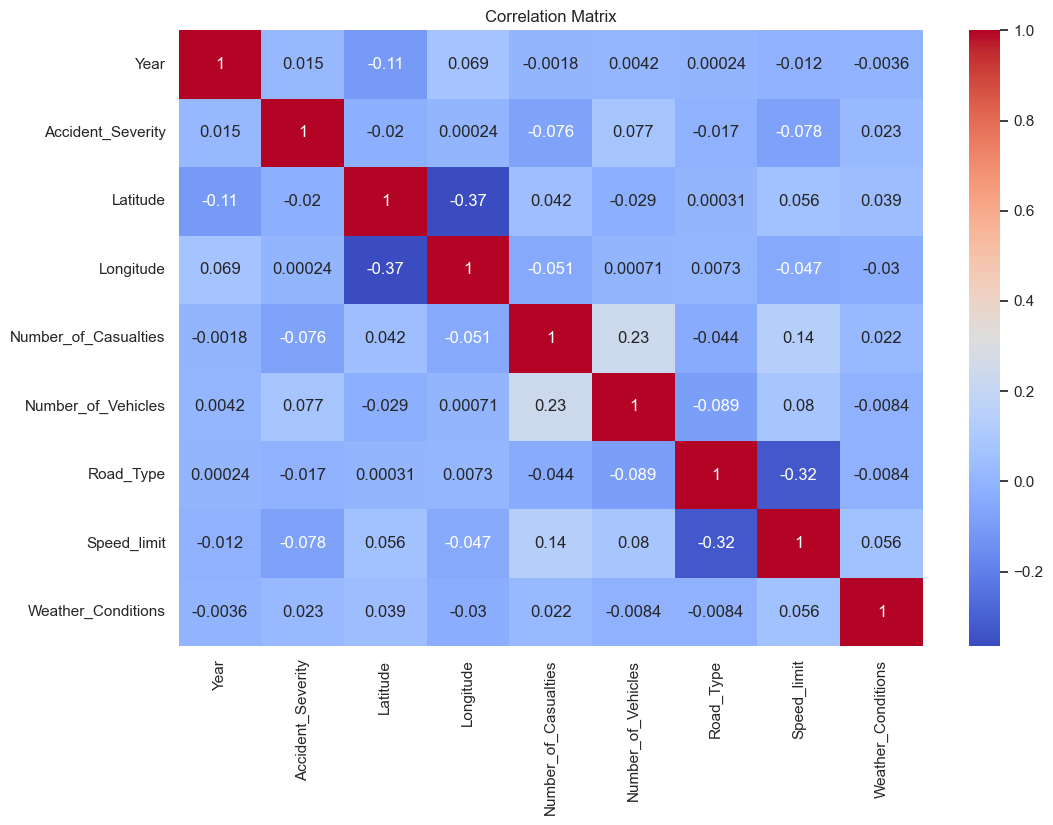

In [34]:
# Calculate correlations for all numeric variables
correlations = data.corr()
print("Correlations with Accident Severity:\n", correlations['Accident_Severity'])

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare the data
X = data[['Year', 'Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Type', 'Speed_limit', 'Weather_Conditions']]
y = data['Accident_Severity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1215
           1       0.36      0.00      0.00     12142
           2       0.86      1.00      0.92     79035

    accuracy                           0.86     92392
   macro avg       0.40      0.33      0.31     92392
weighted avg       0.78      0.86      0.79     92392



C:\Users\Mitch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mitch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mitch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [37]:
data['Accident_Severity'].value_counts()

2    263280
1     40740
0      3953
Name: Accident_Severity, dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Month                       307973 non-null  object        
 3   Day_of_Week                 307973 non-null  object        
 4   Year                        307973 non-null  int64         
 5   Junction_Control            307973 non-null  object        
 6   Junction_Detail             307973 non-null  object        
 7   Accident_Severity           307973 non-null  int8          
 8   Latitude                    307973 non-null  float64       
 9   Light_Conditions            307973 non-null  object        
 10  Local_Authority_(District)  307973 non-null  object        
 11  Carriageway_Hazards         307970 non-

In [49]:
data['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307973 entries, 0 to 307972
Series name: Time
Non-Null Count   Dtype
--------------   -----
307973 non-null  int32
dtypes: int32(1)
memory usage: 1.2 MB


In [52]:
# Verify the data types again after conversion
print(data.dtypes)

Accident_Index                   object
Year                              int64
Quarter                        category
Month                          category
Day                               int64
Accident_Severity              category
Carriageway_Hazards            category
Junction_Control               category
Day_of_Week                    category
Junction_Detail                category
Sum of Latitude                 float64
Light_Conditions               category
Local_Authority_(District)     category
Month.1                        category
Sum of Longitude                float64
Sum of Number_of_Vehicles         int64
Sum of Number_of_Casualties       int64
Police_Force                   category
Road_Surface_Conditions        category
Road_Type                      category
Sum of Speed_limit                int64
Year.1                            int64
Quarter.1                      category
Month.2                        category
Day.1                             int64


In [65]:
file_path = os.getenv('ROAD_ACCIDENT_DATA_PATH')
data = pd.read_excel(file_path)
data.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Month                       307973 non-null  object        
 3   Day_of_Week                 307973 non-null  object        
 4   Year                        307973 non-null  int64         
 5   Junction_Control            307973 non-null  object        
 6   Junction_Detail             307973 non-null  object        
 7   Accident_Severity           307973 non-null  object        
 8   Latitude                    307973 non-null  float64       
 9   Light_Conditions            307973 non-null  object        
 10  Local_Authority_(District)  307973 non-null  object        
 11  Carriageway_Hazards         307970 non-

  Accident_Index Accident Date    Month Day_of_Week  Year  \
0  200901BS70001    2021-01-01  January    Thursday  2021   
1  200901BS70002    2021-01-05  January      Monday  2021   
2  200901BS70003    2021-01-04  January      Sunday  2021   
3  200901BS70004    2021-01-05  January      Monday  2021   
4  200901BS70005    2021-01-06  January     Tuesday  2021   

           Junction_Control          Junction_Detail Accident_Severity  \
0  Give way or uncontrolled  T or staggered junction           Serious   
1  Give way or uncontrolled               Crossroads           Serious   
2  Give way or uncontrolled  T or staggered junction            Slight   
3       Auto traffic signal  T or staggered junction           Serious   
4       Auto traffic signal               Crossroads           Serious   

    Latitude       Light_Conditions  ... Number_of_Casualties  \
0  51.512273               Daylight  ...                    1   
1  51.514399               Daylight  ...                  

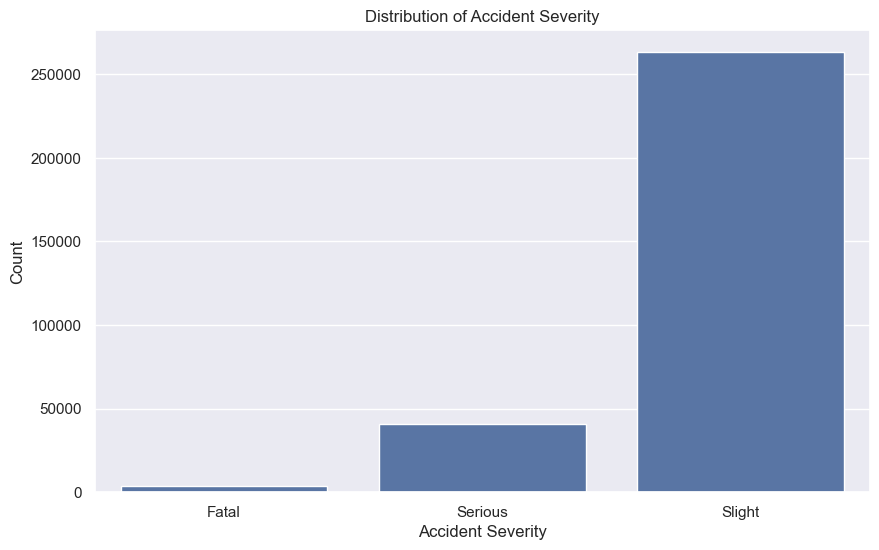

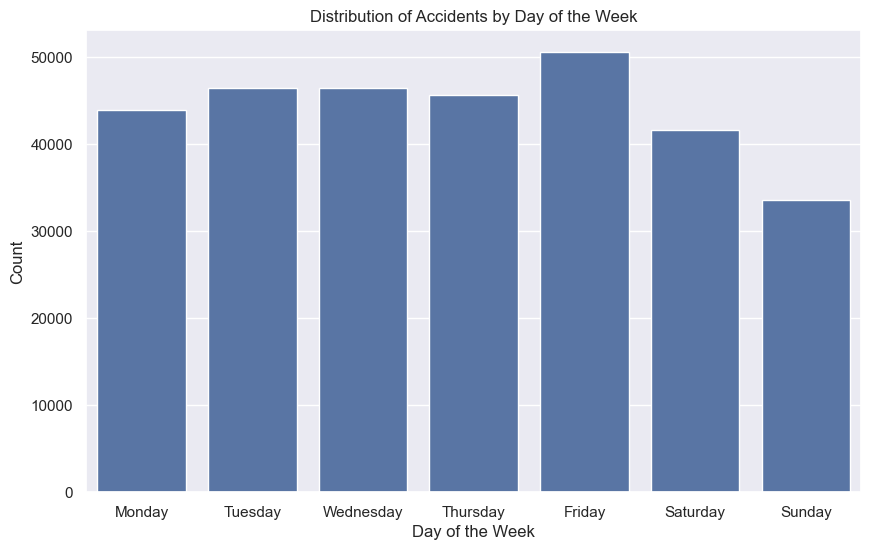

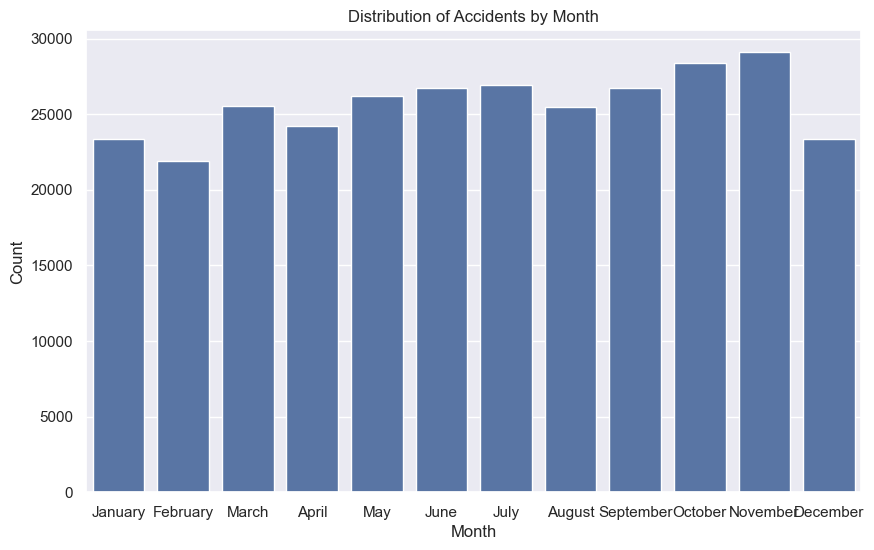

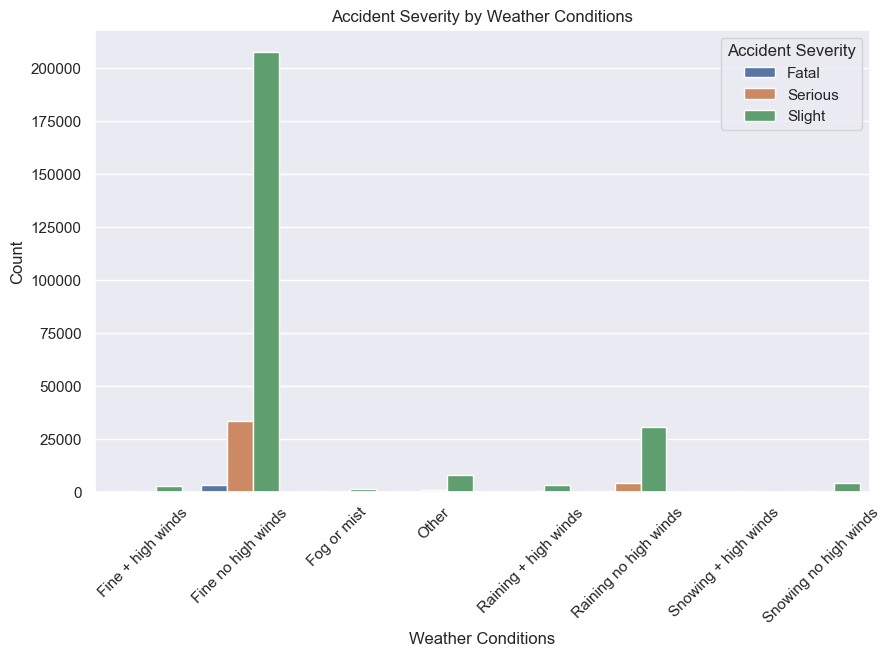

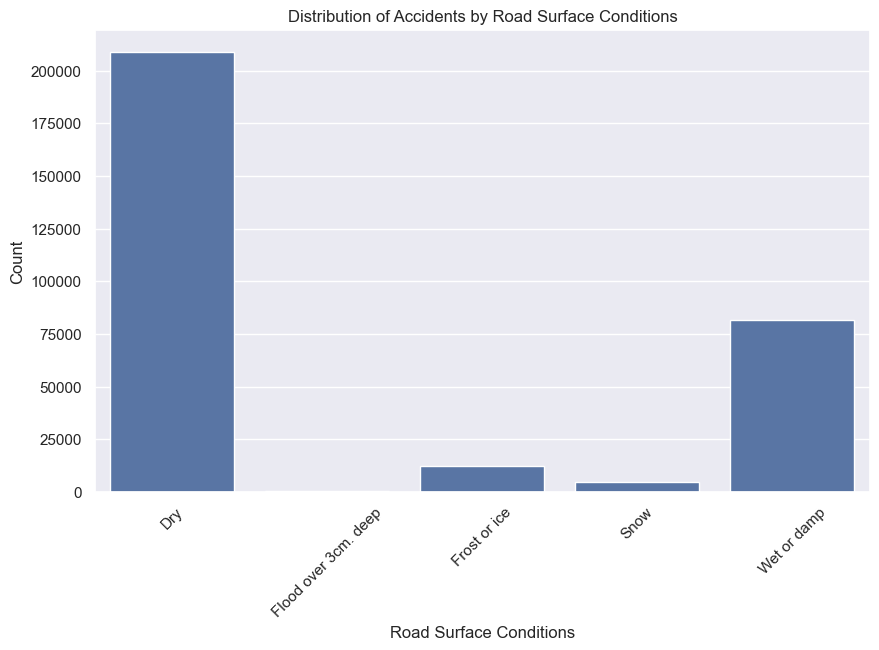

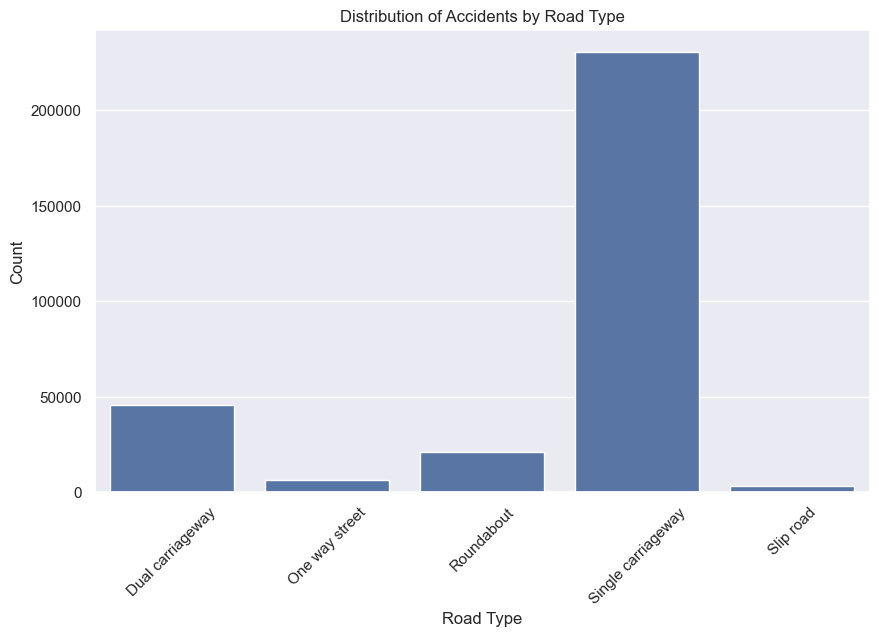

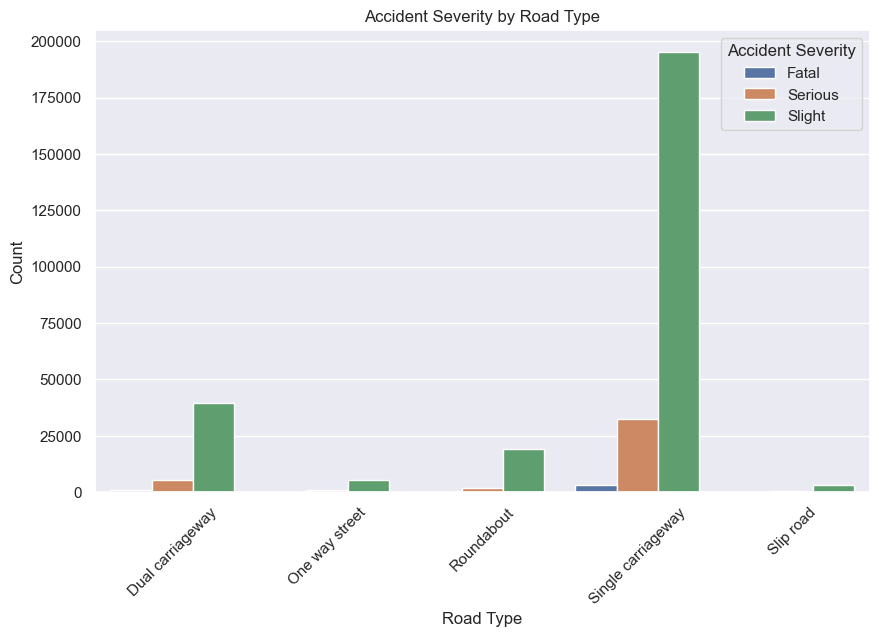

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype


# Define the data types for each column
dtype_dict = {
    'Accident_Index': 'object',
    'Year': 'int64',
    'Month': 'category',
    'Day_of_Week': 'category',
    'Junction_Control': 'category',
    'Junction_Detail': 'category',
    'Accident_Severity': 'category',
    'Latitude': 'float64',
    'Light_Conditions': 'category',
    'Local_Authority_(District)': 'category',
    'Carriageway_Hazards': 'category',
    'Longitude': 'float64',
    'Number_of_Casualties': 'int64',
    'Number_of_Vehicles': 'int64',
    'Police_Force': 'category',
    'Road_Surface_Conditions': 'category',
    'Road_Type': 'category',
    'Speed_limit': 'int64',
    'Urban_or_Rural_Area': 'category',
    'Weather_Conditions': 'category',
    'Vehicle_Type': 'category'
}

# Set the data types for each column
for column, dtype in dtype_dict.items():
    if column in data.columns:
        data[column] = data[column].astype(dtype)

# Convert date and time columns
data['Accident Date'] = pd.to_datetime(data['Accident Date'], format='%Y-%m-%d', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Extract the month from the Accident Date column
data['Month'] = data['Accident Date'].dt.strftime('%B')

# Define the order for months and days of the week
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the columns to ordered categories
month_dtype = CategoricalDtype(categories=month_order, ordered=True)
day_dtype = CategoricalDtype(categories=day_order, ordered=True)

data['Month'] = data['Month'].astype(month_dtype)
data['Day_of_Week'] = data['Day_of_Week'].astype(day_dtype)

# Inspect the first few rows of the dataset
print(data.head())

# Example analysis: Visualize the distribution of accident severity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Accident_Severity')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

# Example analysis: Visualize the distribution of accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Day_of_Week')
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

# Example analysis: Visualize the distribution of accidents by month
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Month')
plt.title('Distribution of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Example analysis: Accident severity by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_Conditions', hue='Accident_Severity')
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.show()

# Example analysis: Accidents by road surface conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Surface_Conditions')
plt.title('Distribution of Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Example analysis: Accidents by road type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Type')
plt.title('Distribution of Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Example analysis: Accident severity by road type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Type', hue='Accident_Severity')
plt.title('Accident Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.show()

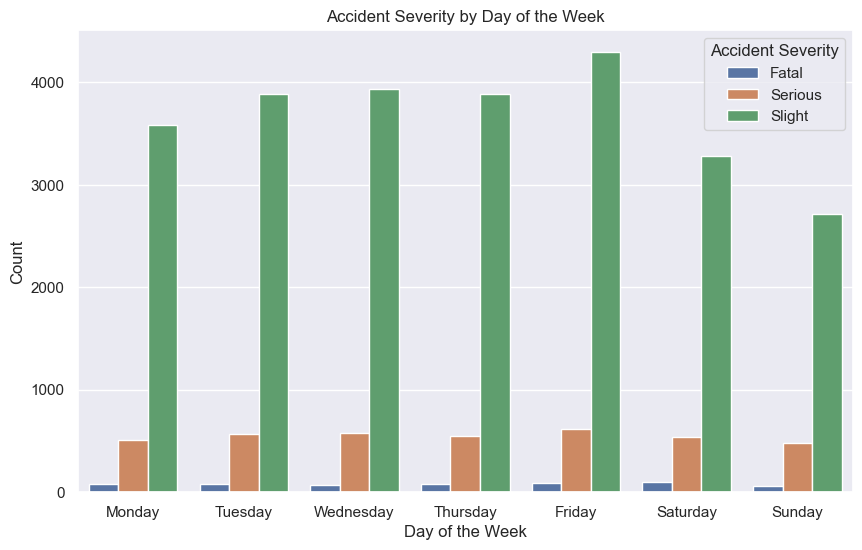

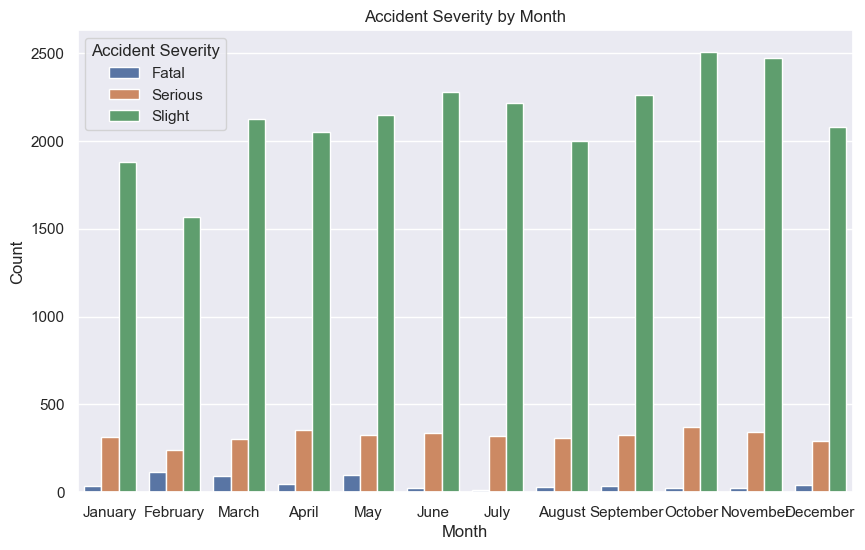

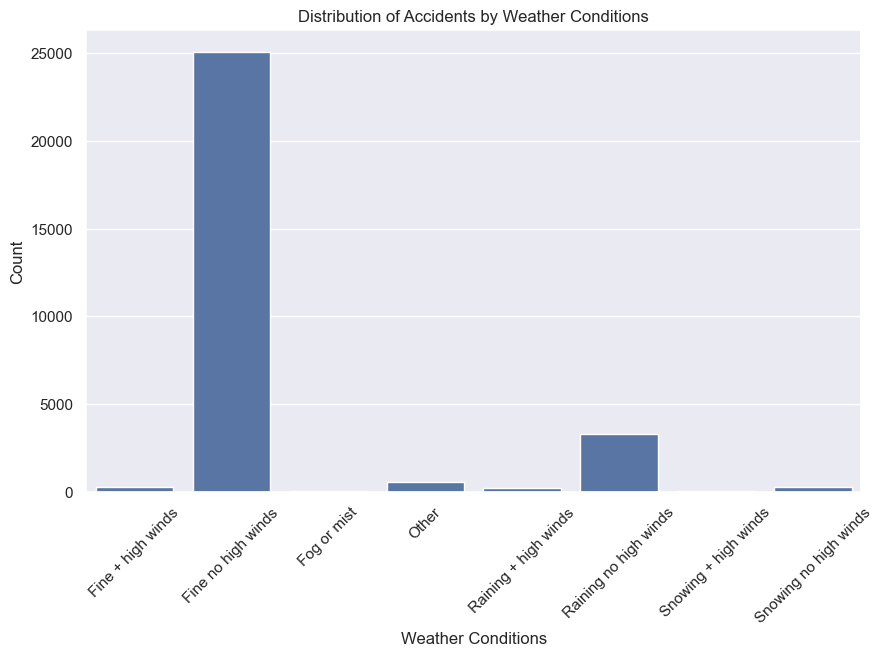

In [63]:
# Example analysis: Accident severity by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Day_of_Week', hue='Accident_Severity')
plt.title('Accident Severity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

# Example analysis: Accident severity by month
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Month', hue='Accident_Severity')
plt.title('Accident Severity by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

# Example analysis: Accidents by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_Conditions')
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

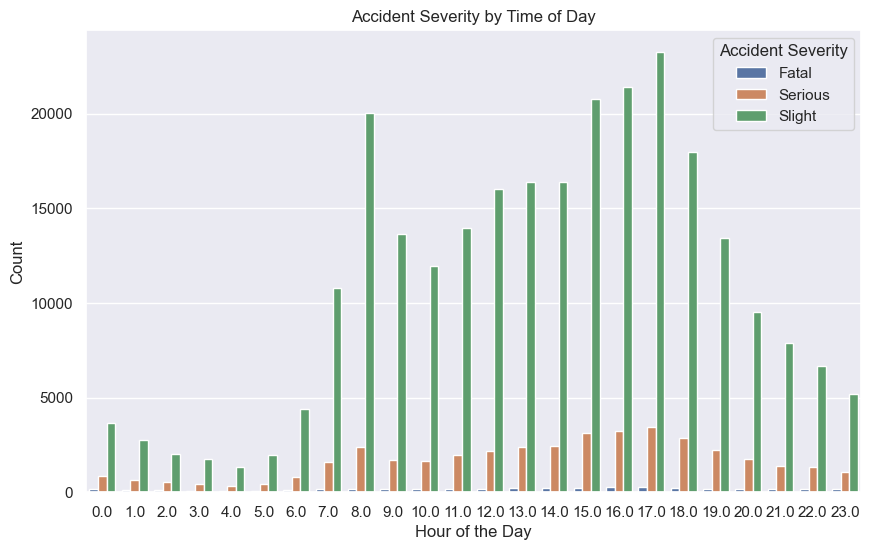

In [69]:
# Example analysis: Accident severity by time of day
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Hour', hue='Accident_Severity')
plt.title('Accident Severity by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

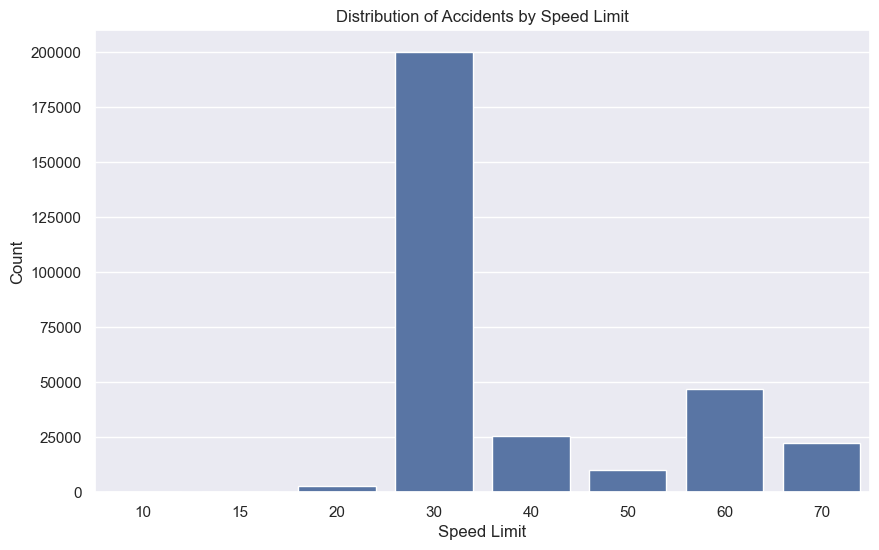

In [70]:
# Example analysis: Accidents by speed limit
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Speed_limit')
plt.title('Distribution of Accidents by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.show()

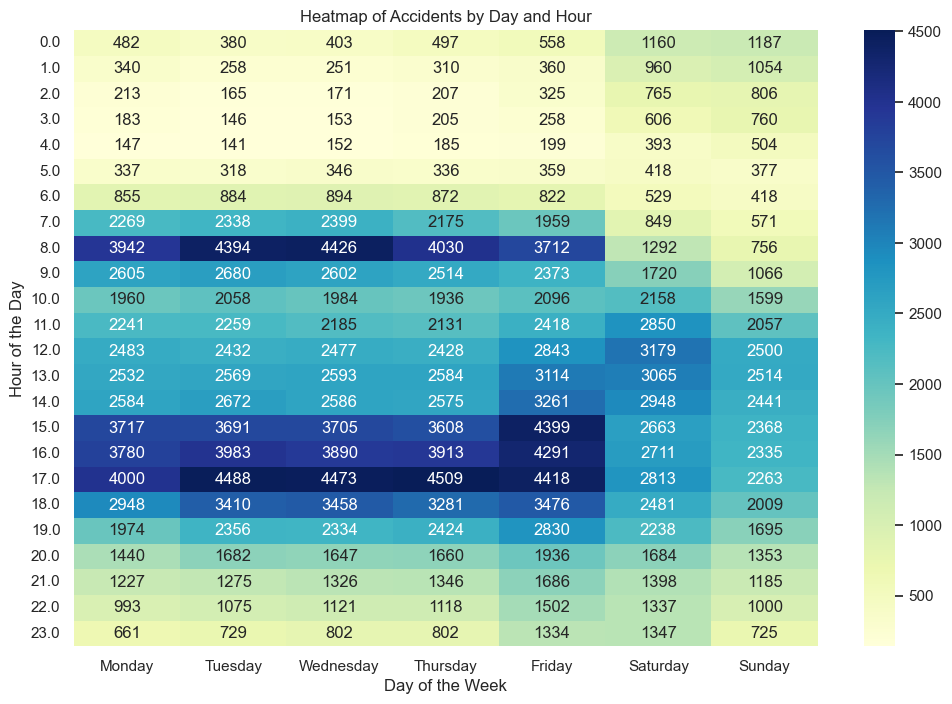

In [72]:
# Example analysis: Heatmap of accidents by day and hour
heatmap_data = data.pivot_table(index=data['Hour'], columns='Day_of_Week', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Accidents by Day and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

In [73]:
# Bin the number of vehicles involved
bins = [1, 2, 3, 4, 5, 10, 20, 50, 100]
labels = ['1', '2', '3', '4', '5', '6-10', '11-20', '21-50', '51+']
data['Vehicles_Binned'] = pd.cut(data['Number_of_Vehicles'], bins=bins, labels=labels, right=False)

# Example analysis: Accidents by number of vehicles involved (binned)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Vehicles_Binned')
plt.title('Distribution of Accidents by Number of Vehicles Involved (Binned)')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Count')
plt.show()

ValueError: Bin labels must be one fewer than the number of bin edges

In [74]:
data['Vehicle_Type'].value_counts()

Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: Vehicle_Type, dtype: int64

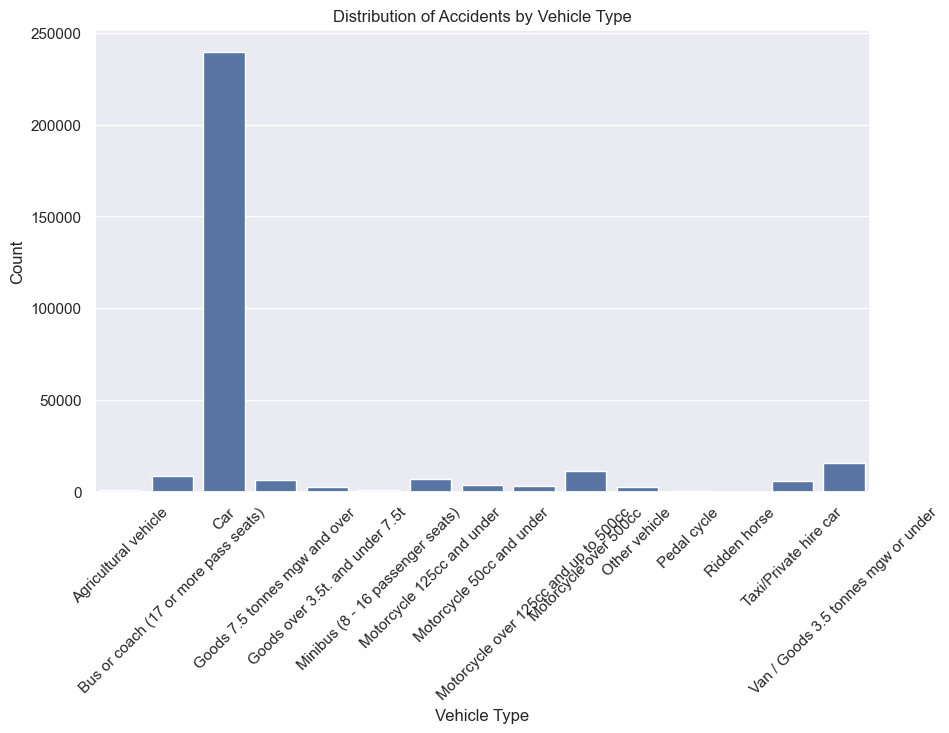

In [75]:
# Example analysis: Accidents by vehicle type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Vehicle_Type')
plt.title('Distribution of Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

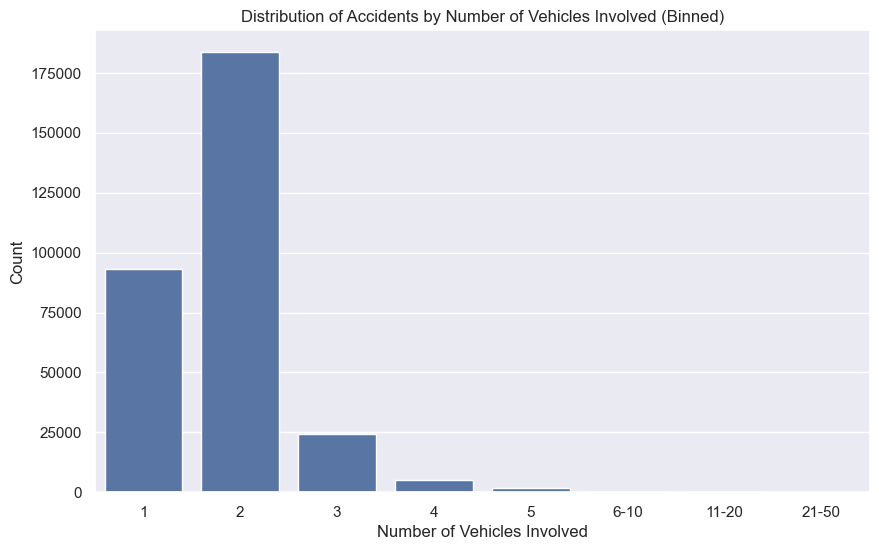

In [77]:
# Adjust bins and labels for the number of vehicles involved
bins = [1, 2, 3, 4, 5, 10, 20, 50, 100]
labels = ['1', '2', '3', '4', '5', '6-10', '11-20', '21-50']
data['Vehicles_Binned'] = pd.cut(data['Number_of_Vehicles'], bins=bins, labels=labels, right=False)

# Example analysis: Accidents by number of vehicles involved (binned)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Vehicles_Binned')
plt.title('Distribution of Accidents by Number of Vehicles Involved (Binned)')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Count')
plt.show()

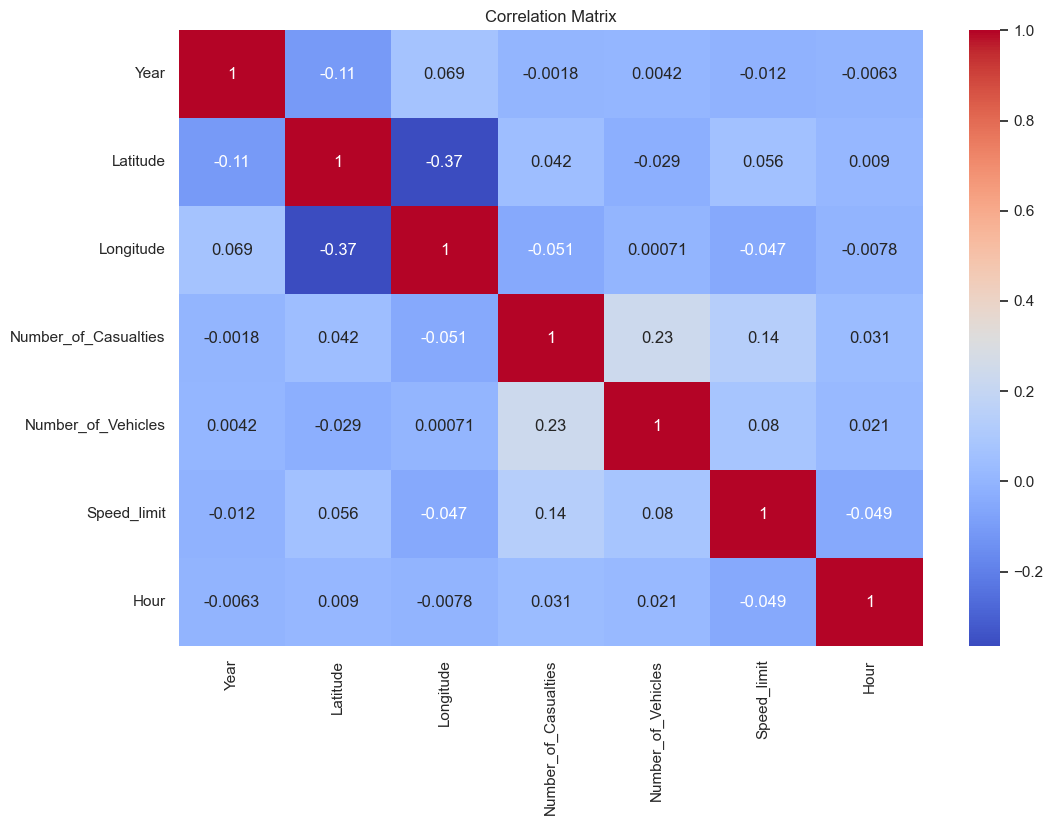

Strongest Positive Correlations:
Series([], dtype: float64)

Strongest Negative Correlations:
Series([], dtype: float64)


In [82]:
# Example analysis: Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify and interpret the strongest correlations involving key variables
key_variables = ['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']
correlation_matrix = data[key_variables].corr(numeric_only=True)
strong_correlations = correlation_matrix.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations[strong_correlations != 1]  # Remove self-correlations
print("Strongest Positive Correlations:")
print(strong_correlations[strong_correlations > 0.5])
print("\nStrongest Negative Correlations:")
print(strong_correlations[strong_correlations < -0.5])

# Example analysis: Pairplot for strong correlations
strong_pairs = strong_correlations[(strong_correlations > 0.5) | (strong_correlations < -0.5)].index
for pair in strong_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=pair[0], y=pair[1])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()